# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col = 0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

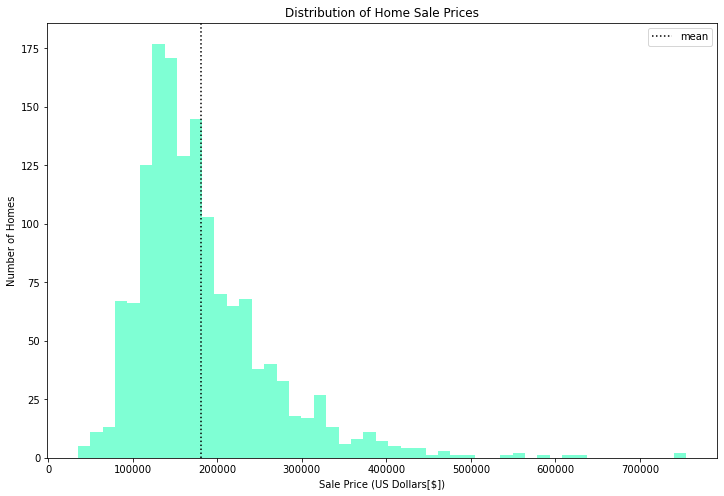

In [6]:
"""
This function plots a histogram given
a DataFrame, column name, title, xlabel and ylabel. 

The plot is customized to include a vertical line 
that represents the mean value of the 
"""
def plot_hist(df,column, title, xlabel, ylabel):
    # Initialize data
    data = df[column]
    mean = data.mean()
    # Set plot parameters
    fig, ax = plt.subplots(figsize = (12,8))
    # Plot histogram
    ax.hist(data, color = 'aquamarine', bins = "auto")
    # Plot vertical Line
    ax.axvline(mean, color = "black", linestyle = "dotted",label= "mean")
    #Customize title and axes labels
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel)
    ax.set_title(title);
    ax.legend();
    
plot_hist(
    df,
    "SalePrice",
    "Distribution of Home Sale Prices",
    "Sale Price (US Dollars[$])",
    "Number of Homes"
    
)





Now, print out the mean, median, and standard deviation:

In [7]:
"""
This function prints out the stats for a single
DataFrame column

inputs: df, column

output: Mean, Median, Standard Deviation
"""

def print_statistics(df, column):
    print("Mean:              ", df['SalePrice'].mean())
    print("Median:            ", df['SalePrice'].median())
    print("Standard Deviation:", df['SalePrice'].std(),)

print_statistics(df, "SalePrice")

Mean:               180921.19589041095
Median:             163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [8]:

"""
The Distribution of Home Sale Price looks like it has a positive distribution that is skewed 
to the right. There are a few outliers beyond the $500,000 mark that are pulling
the mean up to a value greater than $180,000, but most homes are clustered
around the median value of $163,000. 

The average cost for a home in Ames, Iowa between 2006 and 2010
was ~$180,921.20. The median price paid for a home in Ames,
Iowa between 2006 and 2010 was $163,000. 
The home prices in Ames, Iowa typically ranged between $101478.70
and $260,363.70
"""

'\nThe Distribution of Home Sale Price looks like it has a positive distribution that is skewed \nto the right. There are a few outliers beyond the $500,000 mark that are pulling\nthe mean up to a value greater than $180,000, but most homes are clustered\naround the median value of $163,000. \n\nThe average cost for a home in Ames, Iowa between 2006 and 2010\nwas ~$180,921.20. The median price paid for a home in Ames,\nIowa between 2006 and 2010 was $163,000. \nThe home prices in Ames, Iowa typically ranged between $101478.70\nand $260,363.70\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

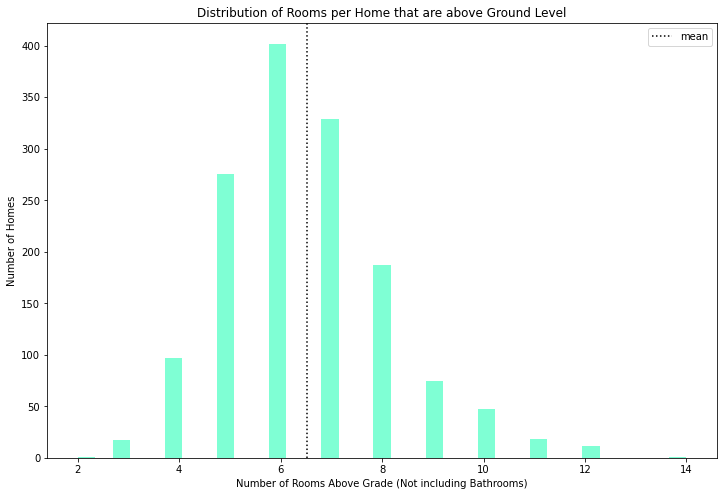

In [9]:
# Plot a histogram for TotRmsAbvGrd 
plot_hist(
    df,
    "TotRmsAbvGrd",
    "Distribution of Rooms per Home that are above Ground Level",
    "Number of Rooms Above Grade (Not including Bathrooms)",
    "Number of Homes"   
)

Now, print out the mean, median, and standard deviation:

In [10]:
print_statistics(df, "TotRmsAbvGrd")

Mean:               180921.19589041095
Median:             163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
The distribution of number of rooms in homes that are above ground looks like 
a an almost symmetrical normal distribution where the mean and median are
~ 6 rooms above ground. 

The mean number of rooms within a single home that were above ground level, 
not including bathrooms in Ames Iowa between 2006 and 2010 was 6.517808219178082.

The Median number of rooms within a single home that were above ground level,
not including bathrooms in Ames Iowa between 2006 and 2010 was 6.0.

The number of rooms within a single home that were above grond level, not
including bathrooms in Ames Iowa between 2006 and 2010 ranged from 4.89241493 to 8.14320151.

"""

'\nThe distribution of number of rooms in homes that are above ground looks like \na an almost symmetrical normal distribution where the mean and median are\n~ 6 rooms above ground. \n\nThe mean number of rooms within a single home that were above ground level, \nnot including bathrooms in Ames Iowa between 2006 and 2010 was 6.517808219178082.\n\nThe Median number of rooms within a single home that were above ground level,\nnot including bathrooms in Ames Iowa between 2006 and 2010 was 6.0.\n\nThe number of rooms within a single home that were above grond level, not\nincluding bathrooms in Ames Iowa between 2006 and 2010 ranged from 4.89241493 to 8.14320151.\n\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

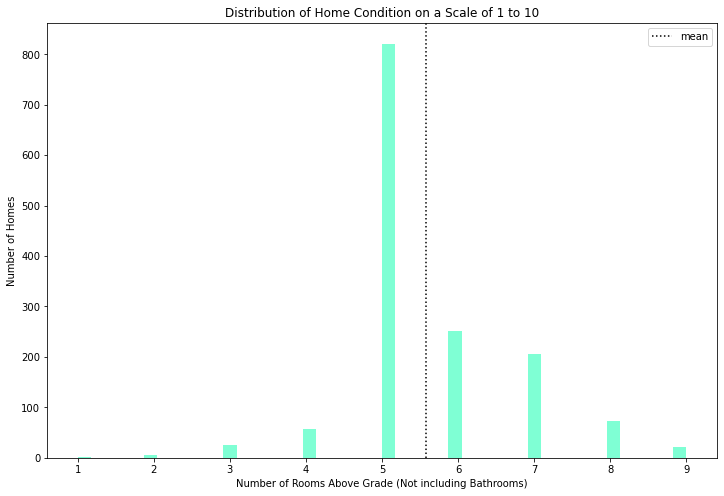

In [12]:
# Plot a histogram for OverallCond 
plot_hist(
    df,
    "OverallCond",
    "Distribution of Home Condition on a Scale of 1 to 10",
    "Number of Rooms Above Grade (Not including Bathrooms)",
    "Number of Homes"   
)


Now, print out the mean, median, and standard deviation:

In [13]:
print_statistics(df, "OverallCond")

Mean:               180921.19589041095
Median:             163000.0
Standard Deviation: 79442.50288288662


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
The distribution of the overall condition of homes seems to have distinct categories with a slightly negative skew. 
Most homes have an overall condion of 5 which seems to map to a category of Average.

The overall condition for a Home in Ames Iowa between 2006 and 2010 ranged from below average
to above average, with very few homes in either the very poor or very good categories.
"""

'\nThe distribution of the overall condition of homes seems to have distinct categories with a slightly negative skew. \nMost homes have an overall condion of 5 which seems to map to a category of Average.\n\nThe overall condition for a Home in Ames Iowa between 2006 and 2010 ranged from below average\nto above average, with very few homes in either the very poor or very good categories.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [15]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [16]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

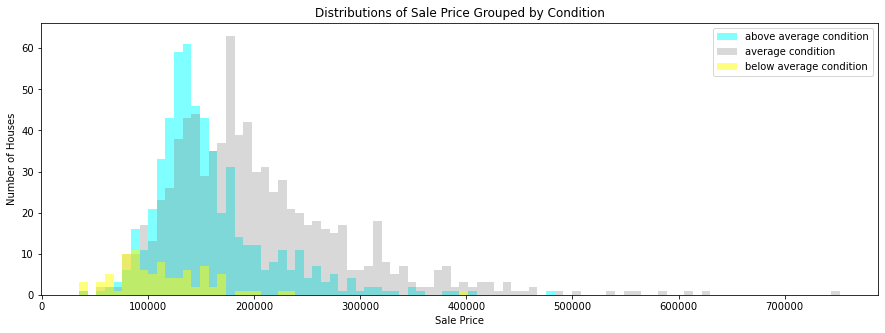

In [17]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [18]:
# Replace None with appropriate text
"""
Most homes have an average condition ( ~56% ), 
Less than 10% of homes are below average condition (~6%), 
Around a third of homes (~38%) have above average condition. 

Predictably, homes with an average condition have a wider range of sale 
price than either the above average or below average homes. Similarly, 
homes with below average home conditions have a distribution of 
sale price that is much lower than either the average or below average homes. 

It is surprising that most of the homes that have an above average condition
are much less costly than homes in average condition. Particularly in the
$200,000-$300,000 range, there is a much larger number of homes that are in 
average condition than in the above average condition. There are also 
no homes above $500,000 that are in above average condition. Most homes in above
average condition are clustered between $100,000 - $200,000. 


"""

'\nMost homes have an average condition ( ~56% ), \nLess than 10% of homes are below average condition (~6%), \nAround a third of homes (~38%) have above average condition. \n\nPredictably, homes with an average condition have a wider range of sale \nprice than either the above average or below average homes. Similarly, \nhomes with below average home conditions have a distribution of \nsale price that is much lower than either the average or below average homes. \n\nIt is surprising that most of the homes that have an above average condition\nare much less costly than homes in average condition. Particularly in the\n$200,000-$300,000 range, there is a much larger number of homes that are in \naverage condition than in the above average condition. There are also \nno homes above $500,000 that are in above average condition. Most homes in above\naverage condition are clustered between $100,000 - $200,000. \n\n\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [19]:
# Print out the name of the column and the Pearson correlation of 
# the column most positively correlated with SalePrace (not including SalePrice)
correlation_values = df.corr()["SalePrice"].sort_values() # Since this is sorted the final value is SalePrice correlated to itself

max_correlation_value = correlation_values.iloc[-2]
max_correlation_column = correlation_values.index[-2]

print("The column that is most positively correlated with Sale Price is:", max_correlation_column)
print("The maximum correlation value is:", max_correlation_value)

The column that is most positively correlated with Sale Price is: OverallQual
The maximum correlation value is: 0.7909816005838047


Now, find the ***most negatively correlated*** column:

In [20]:
#  Find the most negatively correlated column
min_correlation_value = correlation_values.iloc[0]
min_correlation_column = correlation_values.index[0]

print("The most negatively correlated column is:", min_correlation_column)
print("The minimum correlation value is:", min_correlation_value )

The most negatively correlated column is: KitchenAbvGr
The minimum correlation value is: -0.1359073708421417


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

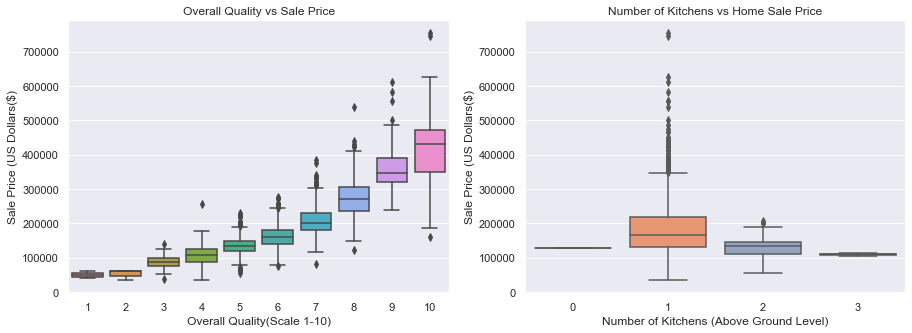

In [21]:

import seaborn as sns
sns.set_theme(style="darkgrid", palette="Set2")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_correlation_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_correlation_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs Sale Price")
ax1.set_xlabel("Overall Quality(Scale 1-10)")
ax1.set_ylabel("Sale Price (US Dollars($)")
ax2.set_title("Number of Kitchens vs Home Sale Price")
ax2.set_xlabel("Number of Kitchens (Above Ground Level)")
ax2.set_ylabel("Sale Price (US Dollars($)");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [22]:
"""
The column with the most positive correlation is overall quality. 
According to the data description file: 

OverallQual: Rates the overall material and finish of the house on a 1 
to 10 scale with 1 corresponding to very poor and 10 with very excellent

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average
       5    Average
       4    Below Average
       3    Fair
       2    Poor
       1    Very Poor

There is another feature called OverallCond which has a similar
rating scale and similar values, however Overall Quality seems to take
into account the type of materials used to build the home.  
While there seems to be a positve relationship between overall condition and
sale price, it seems to possibly by exponential instead of a direct linear
relationship. 

The column with the most negative correlation is then number of above grade kitchen. 
The graph shows that most homes have at least one or two kitchens,
there are outliers with either no kitchen (possibly in the basement) 
or three kitchens above ground level. 

It seems surprising, that the homes with more above grade have lower overall 
sale prices. For example the homes with 2 above grade kitchens sold for $200,000, 
while homes with only one above grade kitchen sold between $300,000 and $700,000.

One thing we might want to investigate is which type of homes have 2 or 3 above 
grade kitchens. Are they also multi-family homes, or rental properties which may 
have lower quality than single family owner occupied homes?
"""

'\nThe column with the most positive correlation is overall quality. \nAccording to the data description file: \n\nOverallQual: Rates the overall material and finish of the house on a 1 \nto 10 scale with 1 corresponding to very poor and 10 with very excellent\n\n       10   Very Excellent\n       9    Excellent\n       8    Very Good\n       7    Good\n       6    Above Average\n       5    Average\n       4    Below Average\n       3    Fair\n       2    Poor\n       1    Very Poor\n\nThere is another feature called OverallCond which has a similar\nrating scale and similar values, however Overall Quality seems to take\ninto account the type of materials used to build the home.  \nWhile there seems to be a positve relationship between overall condition and\nsale price, it seems to possibly by exponential instead of a direct linear\nrelationship. \n\nThe column with the most negative correlation is then number of above grade kitchen. \nThe graph shows that most homes have at least one 

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [23]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

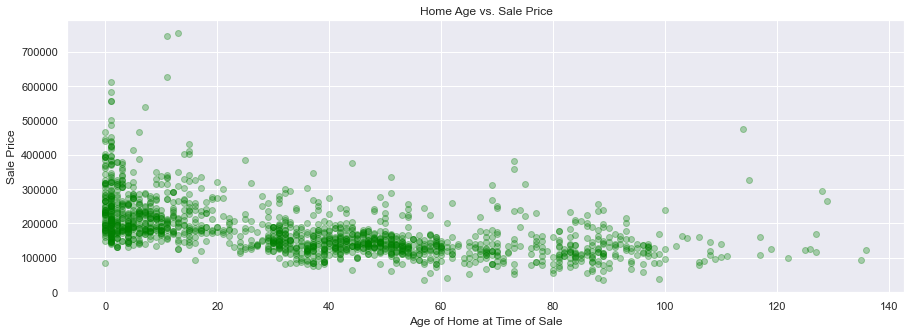

In [24]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [25]:

"""
First we notice that newer homes seem to be the most valuable.
Home prices seem to be generally increasing between being initially built
and around 20 years. 

After homes reach 20 years of home prices tend to max
out around $400,000, with few outliers for homes with age greater than 110
years of age. The majority of homes tend to be sold when they are newer, and
again around the 40 year mark. It may be interesting to delve into this
futher to determine what this trend could be attributed to. 
"""

'\nFirst we notice that newer homes seem to be the most valuable.\nHome prices seem to be generally increasing between being initially built\nand around 20 years. \n\nAfter homes reach 20 years of home prices tend to max\nout around $400,000, with few outliers for homes with age greater than 110\nyears of age. The majority of homes tend to be sold when they are newer, and\nagain around the 40 year mark. It may be interesting to delve into this\nfuther to determine what this trend could be attributed to. \n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.